<h1> Chapter 2: How the backpropagation algorithm works </h1>

**Exercises:**

**Q) Backpropogration withg a single modified neuron:** *Suppose we modify a single neuron in a feedforward network so that the output from the neuron is given by $f(\sum_jw_jx_j+b)$, where $f$ is some function other than the sigmoid. How should we modify the backpropagation algorithm in this case?*

In this case, for the single neuron, $j$ at layer $l$ that has been modified, equation $\text(B.3)$ would become,

$$
\begin{align}
\tag{B.3}
&= \big ( \frac{\partial C}{\partial a_j^{l+1}}\frac{\partial a_j^{l+1}}{\partial z_j^{l+1}}\big ) \big ( \frac{\partial z_j^{l+1}}{\partial a_j^{l}}\frac{\partial a_j^{l}}{\partial z_j^{l}} \big ) \\
\tag{B.4}
&= \big(\delta_j^{l+1}\big)\big(\sum_k w_j^L f^{\prime}(z_j^{L-1})\big)
\end{align}
$$

**Q) Backpropagation with linear neurons:** *Suppose we replace the usual non-linear σ function with $\sigma(z)=z$ throughout the network. Rewrite the backpropagation algorithm for this case.*

If the activation function becomes $\sigma(z)=z$, then the backpropogation equations would become:

Equation 1:

$$
\begin{equation}
\delta_j^L = \frac{\partial C}{\partial a_j^L}
\end{equation}
$$

Equation 2:

$$
\begin{equation}
\vec{\delta^l} = ((\vec{w^{l+1})^T} \vec{\delta^{l+1}})
\end{equation}
$$

Equation 3:

$$
\begin{equation}
\frac{\partial C}{\partial b_{j}^l} = \delta_j^l
\end{equation}
$$

Equation 4:

$$
\begin{equation}
\frac{\partial C}{\partial w_{jk}^l} = a_k^{l-1}\delta_j^l
\end{equation}
$$

### Problem: Fully matrix-based approach to backpropagation over a mini-batch

In [1]:
from mnist_loader import *
train, validate, test = load_data_wrapper()
training_x = train[0]
training_y = train[1]

##### Explanation of training data:

[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


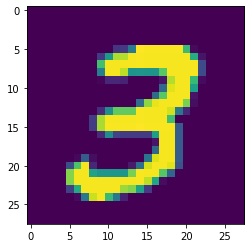

In [2]:
from matplotlib import pyplot as plt
"""
Training data, train, organised into list of 50000 tuples, (X, Y), each composed of an ((784,1), (10,1)) ndarray representing the
pixel data (28*28 = 784) of the written digit X[784] and the correct value Y[10].
"""
plt.imshow(train[7][0].reshape(28,28))
print(train[7][1])

In [3]:
mini_batch_size = 50
minibatch = train[0:mini_batch_size]

##### Explanation of network:

In [4]:
print("Network has shape: (Layer 0, Layer 1, Layer2):")
print(net.sizes)
print('\n')
print('Weights array is:')
print(net.weights[0].shape)
print(net.weights[1].shape)
print('\n')
print('Biases array is:')
print(net.biases[0].shape)
print(net.biases[1].shape)

Network has shape: (Layer 0, Layer 1, Layer2):


NameError: name 'net' is not defined

##### My initial attempt at optimization by vectorizing mini-batch processing:

In [7]:
import networkv
netv = networkv.Network((784,30,10))
%timeit netv.update_mini_batch(minibatch,3.0)

5.74 ms ± 94.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


versus original...

In [8]:
import network

In [9]:
net = network.Network((784,30,10))
%timeit net.update_mini_batch(minibatch, 3.0)

4.14 ms ± 64.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### Timing analysis of code...

In [16]:
%timeit netv.backprop(minibatch)
%timeit [net.backprop(i[0], i[1]) for i in minibatch]

4.76 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.88 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The vectorised version runs roughly 87% faster